# Notebook for Labeling GNSS-RO SPIRE data

Feb 2024
@dittmann

This notebook will use labels provided by Change to generate feature arrays.

TOC:
1. [Part 1: Chang's lables](#1-initial-review-of-chang-labels)
2. [Part 2: Comms lables](#2-spire-downlink-comms-labels)


In [1]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal 
from sklearn.decomposition import PCA
import argparse
import pandas as pd

import sys  
sys.path.insert(1, '/home/stdi2687/leo-ml/scripts')

from feature_extract_util import *

# 1. Chang's labels

### initialize label dataframe
#### !Only run First time!

In [67]:
'''
label_df=pd.read_csv('data/chang_labels.txt', header=7, sep=",")
label_df=label_df.iloc[:,1:6]
label_df["labeled?"]=False
label_df.to_pickle('data/converted_labels.pkl')
'''

next steps:
* Script plotting all from DOY from new source
    * make feature sets() and plot feature sets()
    * add extra features to viz (sig, s4, rfi, etc)

    * handled by `make_label_plots.py` + `feature_extract_util.py`
* Notebook to viz each figure and append feature sets with label
    * handled by this notebook and `view_ro_for_labels.ipynb`
    
* split into test/train- hyperparam opt
* train on all with hyperparams
* test on campaign, including tibor samples



In [86]:
label_df=pd.read_pickle('../data/converted_labels.pkl')
row=label_df[label_df["labeled?"]==False].iloc[0]
sample=row.Filename[7:-8]
fdf=pd.read_pickle("../data/feature_sets/%s.pkl" %sample)
print(sample)
#Initalize all to 3
fdf["y_"]=3

2023.144.125.01.02.G11.SC001_0001


In [84]:
'''
ie = 1 = e region ionospheric scintillation
if = 2 = f region is
n =  3 = NO disturbance
o =  4 = oscillator anomoly
r1 =  5 = L1 rfi
r2 = 6 = L2 rfi
r = 7 = L1 + L2 RFI
a = 8 = suspected tracking/processing artifact
l = 9 = low SNR
d = 10 = unknown disturbance
'''
row_labeled=21
label=1
fdf.iloc[row_labeled,-1]=label
#fdf.iloc[14:19,-1]=label

In [48]:
fdf["y_"]=9

In [87]:
#update feature set with labels
fdf.to_pickle("../data/feature_sets/%s.pkl" %sample)
#update label df that sample is completed

label_df.at[row.name, 'labeled?']= True
label_df.to_pickle('../data/converted_labels.pkl')

# 2. Spire Downlink Comms Labels 
June 2024

In [308]:
label_df=pd.read_pickle('../data/converted_labels_comms.pkl')
row=label_df[label_df["labeled?"]==False].iloc[0]
sample=row.Filename
fdf=pd.read_pickle("../data/feature_sets/%s.pkl" %sample)
print(sample)
#Initalize all to 3
fdf["y_"]=3

IndexError: single positional indexer is out-of-bounds

In [306]:
'''
ie = 1 = e region ionospheric scintillation
if = 2 = f region is
n =  3 = NO disturbance
o =  4 = oscillator anomoly
r1 =  5 = L1 rfi
r2 = 6 = L2 rfi
r = 7 = L1 + L2 RFI
a = 8 = suspected tracking/processing artifact
l = 9 = low SNR
d = 10 = unknown disturbance
'''
row_labeled=1
label=7
#fdf.iloc[row_labeled,-1]=label
fdf.iloc[9:17,-1]=label

In [307]:
#update feature set with labels
fdf.to_pickle("../data/feature_sets/%s.pkl" %sample)
#update label df that sample is completed

label_df.at[row.name, 'labeled?']= True
label_df.to_pickle('../data/converted_labels_comms.pkl')

# 3. Scint Labels 
July 2024

In [160]:
#label_df=pd.read_pickle('../data/converted_labels_scint.pkl')
label_df=pd.read_pickle('../data/converted_labels_scint_v2.pkl')
row=label_df[label_df["labeled?"]==False].iloc[0]
sample=row.Filename
fdf=pd.read_pickle("../data/feature_sets/%s.pkl" %sample)
print(sample)
#Initalize all to 3
# COMMENT OUT NEXT LINE WHEN UPDATING FOR SEVERE SCINT.
#fdf["y_"]=3

IndexError: single positional indexer is out-of-bounds

In [159]:
label_df

,Filename,Approx time (s),Label,Unnamed: 4,Unnamed: 5,labeled?
0,2023.119.117.16.01.G14.SC001_0001,NaN,rfi 2,NaN,NaN,True
1,2023.101.124.19.01.G27.SC001_0001,NaN,rfi 2,NaN,NaN,True
2,2023.009.163.11.01.G10.SC001_0001,NaN,rfi 2,NaN,NaN,True
3,2023.119.135.18.01.G27.SC001_0001,NaN,rfi 2,NaN,NaN,True
4,2023.007.149.08.01.R03.SC001_0001,NaN,rfi 2,NaN,NaN,True
5,2023.050.141.19.01.G29.SC001_0001,NaN,rfi 2,NaN,NaN,True
6,2022.319.122.19.01.G15.SC001_0001,NaN,rfi 2,NaN,NaN,True
7,2023.076.143.00.01.G08.SC001_0001,NaN,rfi 2,NaN,NaN,True
8,2023.033.126.19.01.G25.SC001_0001,NaN,rfi 2,NaN,NaN,True
9,2023.105.149.19.01.G27.SC001_0001,NaN,rfi 2,NaN,NaN,True


In [95]:
fdf

,time,std_l2ol1,ratio_l2ol1,snr_l1_std,snr_l2_std,snr_l1_range,snr_l2_range,rfi_max,coeffpca0,coeffpca1,...,s4_max_L1,sigphi_max_L1,sigphi_max_L2,lat_m,lon_m,elevation_m,occheight_m,slip_L1,slip_L2,y_
0,1.363521e+09,1.568715,1.475983,0.492947,0.718091,3.318971,4.175356,2.690415e-06,-0.527476,-0.849570,...,0.526612,0.037638,0.060111,-14.235494,155.786626,-10.430978,384.197723,0.0,0.0,2
1,1.363521e+09,1.498385,1.385766,0.650411,0.963606,3.240953,5.201559,1.503836e-06,-0.543227,-0.839586,...,0.525753,0.037881,0.060305,-15.183380,155.981016,-11.341169,363.650630,0.0,0.0,2
2,1.363521e+09,1.592399,1.099718,1.157698,1.957103,6.265457,12.209793,4.122734e-06,0.462335,0.886706,...,0.773526,0.023115,0.033063,-16.131060,156.176578,-12.246730,341.516858,0.0,0.0,2
3,1.363521e+09,1.554053,-0.116607,2.536870,2.601903,14.821587,15.335179,1.284231e-06,-0.081578,0.996667,...,0.987918,0.041331,0.086372,-17.078522,156.373401,-13.147680,317.827309,0.0,0.0,8
4,1.363521e+09,1.839400,-0.127270,1.967653,2.375144,17.909885,16.982456,2.146899e-06,0.053172,-0.998585,...,0.946640,0.042046,0.087098,-18.025756,156.571575,-14.044032,292.612907,0.0,0.0,8
5,1.363521e+09,2.224848,0.817949,2.027865,2.329883,14.008257,15.043509,6.872923e-07,0.195067,0.980790,...,0.987561,0.024852,0.057824,-18.972752,156.771197,-14.935802,265.904592,0.0,0.0,8
6,1.363521e+09,1.659216,0.723100,0.412389,0.824106,2.817248,5.035898,1.311424e-06,0.338099,0.941110,...,0.594812,0.015011,0.029544,-19.919497,156.972365,-15.823004,237.733324,0.0,0.0,2
7,1.363521e+09,1.033025,0.945535,0.080996,0.124616,0.548927,0.800965,-3.907061e-08,0.694449,0.719542,...,0.070991,0.004237,0.004416,-20.865981,157.175180,-16.705650,208.130072,0.0,0.0,3
8,1.363521e+09,1.346169,1.191675,0.084972,0.117810,0.510093,0.721294,2.576869e-06,0.581999,0.813190,...,0.059083,0.003931,0.004851,-21.812192,157.379751,-17.583749,177.125822,0.0,0.0,3
9,1.363521e+09,1.304279,1.123019,0.082227,0.121095,0.471603,0.925452,6.940042e-07,0.592458,0.805601,...,0.057139,0.003585,0.004808,-22.758118,157.586188,-18.457311,144.751576,0.0,0.0,3


In [96]:
'''
ie = 1 = e region ionospheric scintillation
if = 2 = f region is
n =  3 = NO disturbance
o =  4 = oscillator anomoly
r1 =  5 = L1 rfi
r2 = 6 = L2 rfi
r = 7 = L1 + L2 RFI
a = 8 = suspected tracking/processing artifact
l = 9 = low SNR
d = 10 = unknown disturbance
s = 11 = severe scintillation
'''
#row_labeled=2
label=11
#fdf.iloc[row_labeled,-1]=label
fdf.iloc[3:7,-1]=label

In [158]:
#update feature set with labels
fdf.to_pickle("../data/feature_sets/%s.pkl" %sample)
#update label df that sample is completed

label_df.at[row.name, 'labeled?']= True
label_df.to_pickle('../data/converted_labels_scint_v2.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '../data/feature_sets/2023.144.103.13.01.E19.SC001_0001.pkl'

# 4. MORE RFI LABELS (aug 2024)

In [85]:
label_df=pd.read_pickle('../data/converted_labels_rfi2_v2.pkl')
row=label_df[label_df["labeled?"]==False].iloc[0]
#row=label_df.iloc[-1]
sample=row.Filename
#sample='2023.119.117.16.01.G14.SC001_0001'
fdf=pd.read_pickle("../data/data/feature_sets/%s.pkl" %sample)
print(sample)
fdf["y_"]=3

IndexError: single positional indexer is out-of-bounds

In [83]:
'''
ie = 1 = e region ionospheric scintillation
if = 2 = f region is
n =  3 = NO disturbance
o =  4 = oscillator anomoly
r1 =  5 = L1 rfi
r2 = 6 = L2 rfi
r = 7 = L1 + L2 RFI
a = 8 = suspected tracking/processing artifact
l = 9 = low SNR
d = 10 = unknown disturbance
s = 11 = severe scintillation
'''
#row_labeled=2
label=1
#fdf.iloc[row_labeled,-1]=label
fdf.iloc[1,-1]=label

In [84]:
#update feature set with labels
fdf.to_pickle("../data/data/feature_sets/%s.pkl" %sample)
#update label df that sample is completed

label_df.at[row.name, 'labeled?']= True
label_df.to_pickle('../data/converted_labels_rfi2_v2.pkl')

* 2023.119.135.18.01.G27.SC001_0001 L2 rfi
* 2022.336.163.11.01.G18.SC001_0001 L1 rfi

* 2023.055.141.19.01.G29.SC001_0001


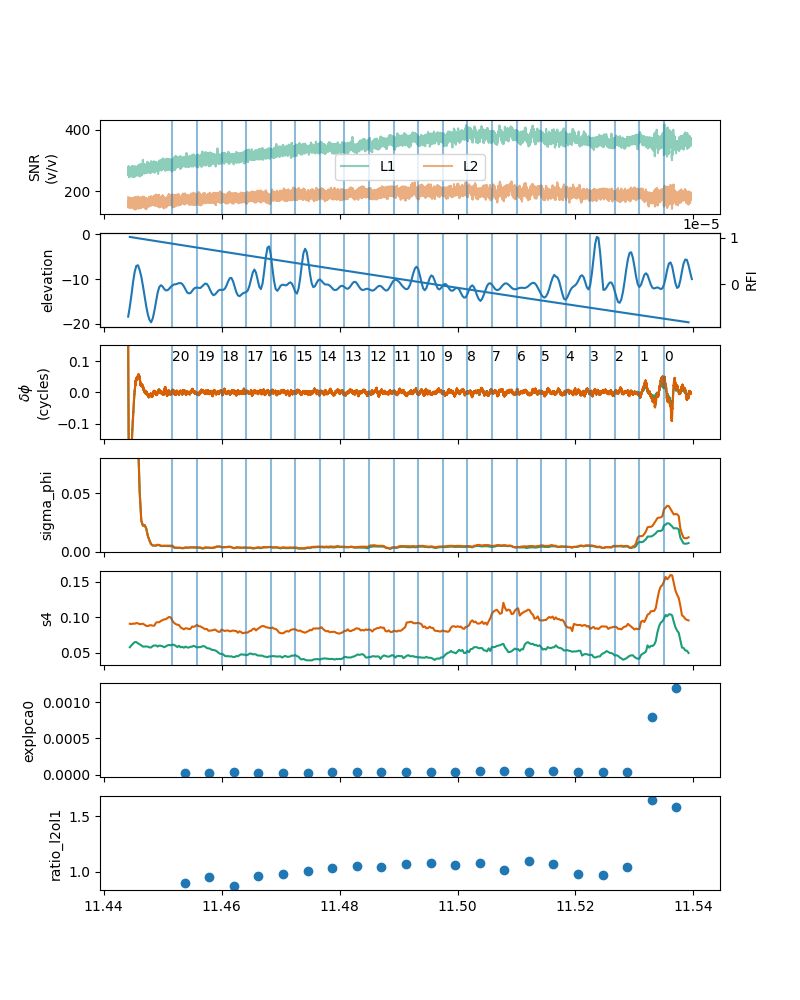

In [ ]:
from IPython.display import Image #/home/stdi2687/gnss-leo-data/figures/labeling/
#Image(filename="figures/2023.144.103.01.01.G10.SC001_0001_features.png")
Image(filename="/home/stdi2687/gnss-leo-data/figures/labeling/2023.144.125.11.01.G31.SC001_0001_features.png")

In [19]:
lv2

<xarray.Dataset>
Dimensions:       (attribute_dimension: 1, time: 315)
Coordinates:
  * time          (time) float64 8.0 9.0 10.0 11.0 ... 319.0 320.0 321.0 322.0
Dimensions without coordinates: attribute_dimension
Data variables: (12/21)
    sigma_phi_L1  (time) float64 ...
    sigma_phi_L2  (time) float64 ...
    slip_L1       (time) int8 ...
    slip_L2       (time) int8 ...
    s4_L1         (time) float64 ...
    s4_L2         (time) float64 ...
    ...            ...
    z_GPS         (time) float64 ...
    lat           (time) float64 ...
    lon           (time) float64 ...
    gast1         (attribute_dimension) float64 ...
    gast2         (attribute_dimension) float64 ...
    leapsec       (attribute_dimension) float64 ...
Attributes: (12/72)
    Conventions:                CF-1.6
    Version:                    $Id$
    alt_s4max_L1:               455.43179350590617
    alt_s4max_L2:               455.43179350590617
    alt_sigmaphimax_L1:         450.30570438033465
    alt_sigmaphimax_L2:         450.30570438033465
    ...                         ...
    sigmaphimin_L2:             0.00987363699823618
    startTime:                  1368926631.0
    stopTime:                   1368926953.0
    subver:                     0001.0001
    timeOfProcessing:           2023.238.03.12.07 GPS time
    year:                       2023

In [8]:
feature_list=[]
window_len=15
windows=np.arange(lv2.time.max(),lv2.time.min(),-window_len)
for i in range(len(windows)-2): #dont include first due to filter?
    subds=sp.sel(time=slice(windows[i+1],windows[i]))
    features, feature_names=get_features_lv1(subds)
    feature_list+=[features]
fdf=pd.DataFrame(feature_list, columns=feature_names)

In [10]:
windows

array([322., 307., 292., 277., 262., 247., 232., 217., 202., 187., 172.,
       157., 142., 127., 112.,  97.,  82.,  67.,  52.,  37.,  22.])

In [4]:
feature_names=['time','std_l2ol1','ratio_l2ol1', 'snr_l1_std', 
                   'snr_l2_std', 'snr_l1_range','snr_l2_range','rfi_max']
#features=np.hstack((features,coeff, explained, spectro_l1_vals, spectro_l2_vals))
feature_names=np.hstack((feature_names, ['coeffpca0','coeffpca1'],['explpca0','explpca1']))
feature_names2=['time','s4_max_L1','s4_max_L1', 'sigphi_max_L1', 
                   'sigphi_max_L2', 'lat', 'lon' ]
print(feature_names+feature_names2)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U12'), dtype('<U13')) -> None

In [9]:
list(feature_names)

['time',
 'std_l2ol1',
 'ratio_l2ol1',
 'snr_l1_std',
 'snr_l2_std',
 'snr_l1_range',
 'snr_l2_range',
 'rfi_max',
 'coeffpca0',
 'coeffpca1',
 'explpca0',
 'explpca1']

In [7]:
type(feature_names2)

list

In [43]:
pd.read_pickle("data/feature_sets/2023.144.169.04.01.E33.SC001_0001.pkl")

,time,std_l2ol1,ratio_l2ol1,snr_l1_std,snr_l2_std,snr_l1_range,snr_l2_range,rfi_max,coeffpca0,coeffpca1,...,s4_max_L1,s4_max_L1,sigphi_max_L1,sigphi_max_L2,lat_m,lon_m,elevation_m,occheight_m,slip_L1,slip_L2
0,1.368938e+09,1.703152,1.701049,0.203107,0.399701,1.389778,2.409885,4.666168e-06,-0.506096,-0.862477,...,0.102170,0.198996,0.068262,0.115249,73.134645,99.832869,-20.324232,82.264360,0.0,0.0
1,1.368938e+09,1.661179,1.658494,0.235994,0.426385,1.236179,2.324303,4.266570e-06,-0.515457,-0.856915,...,0.115347,0.212852,0.065150,0.109972,73.978113,101.431190,-19.380469,120.619699,0.0,0.0
2,1.368938e+09,1.707453,1.701398,0.196766,0.380838,1.261736,1.992893,1.698137e-07,-0.504718,-0.863284,...,0.097208,0.193352,0.036278,0.062355,74.809418,103.194183,-18.433679,157.336828,0.0,0.0
3,1.368938e+09,1.701609,1.700444,0.188026,0.381391,1.220986,1.850615,2.030720e-07,-0.506538,-0.862217,...,0.090087,0.190471,0.066883,0.113976,75.626465,105.147392,-17.483831,192.389994,0.0,0.0
4,1.368938e+09,1.699803,1.696466,0.174842,0.367003,1.186575,1.724570,1.453124e-06,-0.506704,-0.862120,...,0.089649,0.179642,0.043729,0.075081,76.426696,107.320952,-16.530896,225.753444,0.0,0.0
5,1.368938e+09,1.632576,1.625367,0.187956,0.359474,1.165703,1.845317,1.687647e-06,0.521565,0.853211,...,0.091421,0.174457,0.033586,0.055838,77.206968,109.750272,-15.574846,257.401434,0.0,0.0
6,1.368938e+09,1.708689,1.705586,0.171211,0.354866,1.092836,1.780542,6.494851e-07,0.504766,0.863256,...,0.083343,0.184680,0.046770,0.080624,77.963413,112.476624,-14.615651,287.308246,0.0,0.0
7,1.368938e+09,1.722291,1.720544,0.153834,0.348370,0.978800,1.733604,7.257863e-07,-0.501931,-0.864907,...,0.082752,0.187893,0.046767,0.080624,78.691264,115.547414,-13.653282,315.448197,0.0,0.0
8,1.368938e+09,1.724183,1.712509,0.152111,0.331622,1.133881,1.530088,1.567637e-07,-0.500439,-0.865772,...,0.071953,0.155340,0.017993,0.030977,79.384650,119.015768,-12.687714,341.795656,0.0,0.0
9,1.368938e+09,1.650005,1.549672,0.145188,0.324773,1.073221,1.687983,-1.585943e-08,0.507057,0.861912,...,0.077613,0.155340,0.011946,0.021290,80.036387,122.938793,-11.718917,366.325066,0.0,0.0
